# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85685          0.77611              0.00005   
1            1.00000           0.85685          0.85504              0.00010   
2            1.00000           0.76639          0.16642              0.00010   
3            1.00000           0.76639          0.16704              0.00020   
4            1.00000           0.21599          0.54411              0.00020   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.94024                0.01245                   0.03605   
1            0.94096                0.00088                   0.01432   
2            0.92881                0.00690                   0.00880   
3            0.92891                0.01703                   0.02154   
4            0.93800                0.00872                   0.01401   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.03514            0.00215                0.00046  ...   
1               0.02432            0.00028                0.00006  ...   
2               0.00743            0.00695                0.00039  ...   
3               0.01824            0.00695                0.01428  ...   
4               0.01486            0.00695                0.01224  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol             service  \
0        4868                      32       tcp  smb,gssapi,dce_rpc   
1        1910                      28       tcp                 ftp   
2        1663                       6       tcp                 ssl   
3       51530                      41       tcp                 ssl   
4       43967                      31       tcp                 ssl   

   conn_state       orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0          SF  orig_reg_or_dyn  resp_well_known              No           Yes   
1          SF  orig_reg_or_dyn          resp_21              No           Yes   
2          SF  orig_reg_or_dyn         resp_443              No            No   
3          SF  orig_reg_or_dyn         resp_443              No            No   
4          SF  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0  2017-07-04T18:08:16.759946Z  
1  2017-07-04T18:10:38.812648Z  
2  2017-07-04T17:49:59.530842Z  
3  2017-07-04T17:50:00.652192Z  
4  2017-07-04T18:01:19.250643Z  

[5 rows x 300 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85685          0.46159              0.00001   
1            1.00000           0.85685          0.02466              0.00002   
2            1.00000           0.85685          0.02701              0.00011   
3            1.00000           0.31719          0.73495              0.00018   
4            1.00000           0.21599          0.81948              0.00014   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.78098                0.00062                   0.00082   
1            0.94379                0.00062                   0.00062   
2            0.92228                0.00061                   0.00062   
3            0.93987                0.01113                   0.01316   
4            0.94060                0.00872                   0.01401   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00135            0.00079                0.00007  ...   
1               0.00068            0.00079                0.00004  ...   
2               0.00068            0.00079                0.00005  ...   
3               0.01014            0.00695                0.00130  ...   
4               0.01486            0.00695                0.01146  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         288                       2       udp      dns          SF   
1         155                       1       udp      dns          SF   
2         197                       1       udp      dns          SF   
3        4972                       9       tcp      ssl          SF   
4       41263                      31       tcp      ssl          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn    resp_443              No            No   
4  orig_reg_or_dyn    resp_443              No            No   

                     timestamp  
0  2017-07-04T17:58:50.741906Z  
1  2017-07-04T17:45:44.421073Z  
2  2017-07-04T17:45:48.652745Z  
3  2017-07-04T18:07:02.695161Z  
4  2017-07-04T18:09:34.827353Z  

[5 rows x 300 columns]

## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 18602 rows and 300 columns


In [6]:
# selected_df.info()

In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode          3
orig_orig_connection.service_mode           5
orig_orig_connection.conn_state_mode        3
orig_resp_connection.protocol_mode          4
orig_resp_connection.service_mode           5
orig_resp_connection.conn_state_mode        6
resp_orig_connection.protocol_mode          4
resp_orig_connection.service_mode           4
resp_orig_connection.conn_state_mode        4
resp_resp_connection.protocol_mode          3
resp_resp_connection.service_mode           6
resp_resp_connection.conn_state_mode       11
uid                                     18602
originated_ip                              17
responded_ip                             1354
protocol                                    3
service                                    15
conn_state                                 11
orig_p_cat                                  2
resp_p_cat                                  9
attacker_label                              2
victim_label                      

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        18602.00000       18602.00000      18602.00000   
mean             0.98908           0.72294          0.46017   
std              0.04104           0.24925          0.30926   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.76639          0.16186   
50%              1.00000           0.85685          0.46168   
75%              1.00000           0.85685          0.70956   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          18602.00000        18602.00000            18602.00000   
mean               0.00851            0.75585                0.00683   
std                0.02620            0.26045                0.02077   
min                0.00000            0.00000                0.00000   
25%                0.00001            0.73217                0.00057   
50%                0.00004            0.85892                0.00084   
75%                0.00304            0.92930                0.00742   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               18602.00000           18602.00000        18602.00000   
mean                    0.00812               0.00648            0.00374   
std                     0.02381               0.02089            0.03002   
min                     0.00000               0.00000            0.00000   
25%                     0.00077               0.00135            0.00079   
50%                     0.00100               0.00135            0.00079   
75%                     0.00957               0.00811            0.00212   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            18602.00000               18602.00000           18602.00000   
mean                 0.00246                   0.00257               0.00544   
std                  0.02120                   0.02132               0.02097   
min                  0.00000                   0.00000               0.00000   
25%                  0.00003                   0.00005               0.00096   
50%                  0.00006                   0.00008               0.00096   
75%                  0.00079                   0.00114               0.00481   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 18602.00000 18602.00000 18602.00000 18602.00000  18602.00000   
mean      0.56107     0.07112     0.06687     0.20433      0.01588   
std       0.49627     0.25703     0.24981     0.40322      0.04209   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      18602.00000                     18602.00000   
mean           0.42960                         0.45711   
std            0.27657                         0.30954   
min            0.00000                         0.00000   
25%            0.19492                         0.16488   
50%            0.34355                         0.44667   
75%            0.64537                         0.72705   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         18602.00000   
mean                              0.24039   
std                               0.18992   
min                               0.00000   
25%  

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.46159              0.00001            0.78098   
1          0.02466              0.00002            0.94379   
2          0.02701              0.00011            0.92228   
3          0.73495              0.00018            0.93987   
4          0.81948              0.00014            0.94060   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00062               0.00135            0.00079   
1                0.00062               0.00068            0.00079   
2                0.00061               0.00068            0.00079   
3                0.01113               0.01014            0.00695   
4                0.00872               0.01486            0.00695   

   connection.resp_bytes  connection.resp_pkts       orig_p_cat resp_p_cat  \
0                0.00007               0.00096  orig_reg_or_dyn    resp_53   
1                0.00004               0.00048  orig_reg_or_dyn    resp_53   
2                0.00005               0.00048  orig_reg_or_dyn    resp_53   
3                0.00130               0.00433  orig_reg_or_dyn   resp_443   
4                0.01146               0.01491  orig_reg_or_dyn   resp_443   

  protocol service conn_state  dns_count  ssh_count  http_count  ssl_count  \
0      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
1      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
2      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
3      tcp     ssl         SF    0.00000    0.00000     0.00000    1.00000   
4      tcp     ssl         SF    0.00000    0.00000     0.00000    1.00000   

   files_count  orig_orig_total  orig_orig_connection.time_mean  \
0      0.00000          0.96806                         0.44535   
1      0.00000          0.56975                         0.05732   
2      0.00000          0.56975                         0.05732   
3      0.09375          0.21252                         0.74616   
4      0.12500          0.29922                         0.85402   

   orig_orig_connection.duration_mean  orig_orig_connection.orig_pkts_mean  \
0                             0.41426                              0.29279   
1                             0.00296                              0.00232   
2                             0.00296                              0.00232   
3                             0.15931                              0.47491   
4                             0.12081                              0.42460   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.resp_bytes_mean  \
0                               0.52233                               0.08241   
1                               0.00320                               0.00208   
2                               0.00320                               0.00208   
3                               0.29575                               0.50941   
4                               0.28647                               0.41005   

   orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
0                              0.25027                            0.09901   
1                              0.02696                            0.02970   
2                              0.02696                            0.02970   
3                              0.70194                            0.14851   
4                              0.58014                            0.15842   

   orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_count  \
0                            0.96914                    0.66667   
1                            0.57255                    0.00000   
2                            0.57255                    0.00000   
3                            0.20486                    0.66667   
4                            0.29153                    0.66667   

   orig_orig_resp_p_22_count  orig_orig_resp_p_53_co

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.4615899049411903, 1.4892858573851628e-05, 0.7809757809757809,
        ..., 'udp', 'dns', 'SF'],
       [0.024659938397736, 1.8156248178267945e-05, 0.9437941611854654,
        ..., 'udp', 'dns', 'SF'],
       [0.0270113250697967, 0.0001064569322612, 0.9222763135806612, ...,
        'udp', 'dns', 'SF'],
       ...,
       [0.4744248041090124, 0.0012532576053563, 0.8604239473804691, ...,
        'tcp', 'ssl', 'SF'],
       [0.4334189046932481, 0.0001666065682875, 0.1806736154562241, ...,
        'udp', 'dns', 'SF'],
       [0.140830421724563, 1.1064354109129039e-07, 0.2450898103072015,
        ..., 'udp', 'dns', 'SF']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:55:55.
Cluster initiation:  1 (00:56:08), gamma: 0.11364593661575302
Cluster initiation:  2 (00:56:35), gamma: 0.11364593661575302
Cluster initiation:  3 (00:57:16), gamma: 0.11364593661575302
Cluster initiation:  4 (00:58:04), gamma: 0.11364593661575302
Cluster initiation:  5 (00:59:15), gamma: 0.11364593661575302
Cluster initiation:  6 (01:00:32), gamma: 0.11364593661575302
Cluster initiation:  7 (01:01:46), gamma: 0.11364593661575302
Done at 01:01:46.


In [18]:
print_info

['Cluster initiation:  1 (00:56:08), gamma: 0.11364593661575302',
 'Cluster initiation:  2 (00:56:35), gamma: 0.11364593661575302',
 'Cluster initiation:  3 (00:57:16), gamma: 0.11364593661575302',
 'Cluster initiation:  4 (00:58:04), gamma: 0.11364593661575302',
 'Cluster initiation:  5 (00:59:15), gamma: 0.11364593661575302',
 'Cluster initiation:  6 (01:00:32), gamma: 0.11364593661575302',
 'Cluster initiation:  7 (01:01:46), gamma: 0.11364593661575302']

In [19]:
cost

[103349.64166292053,
 75788.06423539316,
 53297.097728292814,
 40514.544541592484,
 36390.492390817744,
 33452.52948207515,
 31092.896606452217]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

Cluster         Cost
0        1 103349.64166
1        2  75788.06424
2        3  53297.09773
3        4  40514.54454
4        5  36390.49239
5        6  33452.52948
6        7  31092.89661

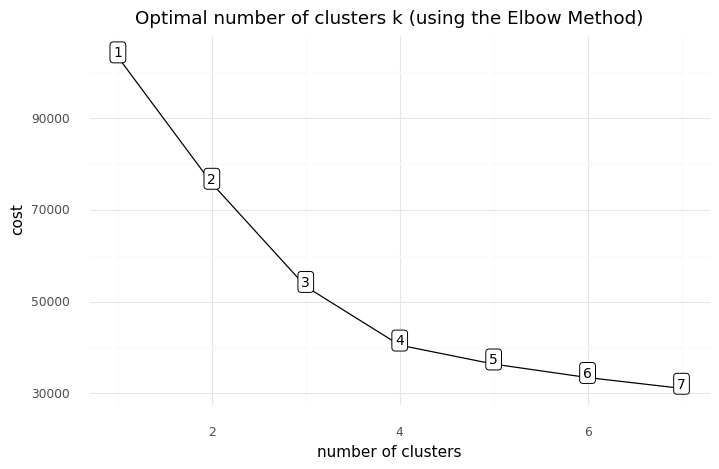

<ggplot: (8754796534143)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [23]:
# Fit the cluster
OPTIMAL_K = 4

kprototype = computed_clusters[OPTIMAL_K]

In [24]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.4636960460918954', '0.0008805655673495907',
        '0.7036215910023528', '0.0014371763826189514',
        '0.001833065823192035', '0.0016053282871494052',
        '7.893916059908626e-05', '0.0011645421838537716',
        '0.9735733991578336', '0.0', '0.0', '0.0',
        '3.63002758820967e-05', '0.3636128116972655',
        '0.4595445278199042', '0.32307829613453687', '0.296764221097189',
        '0.2995591555855938', '0.14500678228393848',
        '0.2902128369087016', '0.09178866195026883',
        '0.3608085346596481', '0.4094187115822111',
        '0.003715304426789367', '0.21997254798184682',
        '0.24527470546706437', '0.06377202216737166',
        '0.22643189546803316', '0.0', '0.2588234705066699',
        '0.18293725698980248', '0.22927254247132278',
        '0.5608435676461526', '0.006006696989787558',
        '0.3253041783064426', '0.2764821814466667',
        '0.27792548640002124', '0.0021835706934979124', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.

In [25]:
# Check the iteration of the clusters created
kprototype.n_iter_

6

In [26]:
# Check the cost of the clusters created
kprototype.cost_

36390.492390817744

In [27]:
# df.drop('Cluster Labels', axis=1, inplace=True)
# df.drop('cluster', axis=1, inplace=True)
# df.head()

In [28]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [29]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.46159              0.00001            0.78098   
1          0.02466              0.00002            0.94379   
2          0.02701              0.00011            0.92228   
3          0.73495              0.00018            0.93987   
4          0.81948              0.00014            0.94060   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00062               0.00135            0.00079   
1                0.00062               0.00068            0.00079   
2                0.00061               0.00068            0.00079   
3                0.01113               0.01014            0.00695   
4                0.00872               0.01486            0.00695   

   connection.resp_bytes  connection.resp_pkts       orig_p_cat resp_p_cat  \
0                0.00007               0.00096  orig_reg_or_dyn    resp_53   
1                0.00004               0.00048  orig_reg_or_dyn    resp_53   
2                0.00005               0.00048  orig_reg_or_dyn    resp_53   
3                0.00130               0.00433  orig_reg_or_dyn   resp_443   
4                0.01146               0.01491  orig_reg_or_dyn   resp_443   

  protocol service conn_state  dns_count  ssh_count  http_count  ssl_count  \
0      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
1      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
2      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
3      tcp     ssl         SF    0.00000    0.00000     0.00000    1.00000   
4      tcp     ssl         SF    0.00000    0.00000     0.00000    1.00000   

   files_count  orig_orig_total  orig_orig_connection.time_mean  \
0      0.00000          0.96806                         0.44535   
1      0.00000          0.56975                         0.05732   
2      0.00000          0.56975                         0.05732   
3      0.09375          0.21252                         0.74616   
4      0.12500          0.29922                         0.85402   

   orig_orig_connection.duration_mean  orig_orig_connection.orig_pkts_mean  \
0                             0.41426                              0.29279   
1                             0.00296                              0.00232   
2                             0.00296                              0.00232   
3                             0.15931                              0.47491   
4                             0.12081                              0.42460   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.resp_bytes_mean  \
0                               0.52233                               0.08241   
1                               0.00320                               0.00208   
2                               0.00320                               0.00208   
3                               0.29575                               0.50941   
4                               0.28647                               0.41005   

   orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
0                              0.25027                            0.09901   
1                              0.02696                            0.02970   
2                              0.02696                            0.02970   
3                              0.70194                            0.14851   
4                              0.58014                            0.15842   

   orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_count  \
0                            0.96914                    0.66667   
1                            0.57255                    0.00000   
2                            0.57255                    0.00000   
3                            0.20486                    0.66667   
4                            0.29153                    0.66667   

   orig_orig_resp_p_22_count  orig_orig_resp_p_53_co

In [30]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [31]:
df['cluster'].value_counts()

0    6887
1    3814
4    3615
3    2807
2    1479
Name: cluster, dtype: int64

## 2. Results

In [32]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0           0     6887      udp     dns         SF  orig_reg_or_dyn   
1           1     3814      tcp     ssl         SF  orig_reg_or_dyn   
2           2     1479      tcp     ssh         SF  orig_reg_or_dyn   
3           3     2807      tcp    http         SF  orig_reg_or_dyn   
4           4     3615      udp     dns         SF  orig_reg_or_dyn   

  resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0    resp_53          0.46370              0.00088                0.00144   
1   resp_443          0.46740              0.02579                0.01824   
2    resp_22          0.43253              0.00647                0.02004   
3    resp_80          0.41651              0.01565                0.00558   
4    resp_53          0.49104              0.00012                0.00062   

   connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0               0.00183                0.00008               0.00116   
1               0.01677                0.00965               0.01471   
2               0.01461                0.00070               0.01460   
3               0.00701                0.00255               0.00489   
4               0.00076                0.00004               0.00049   

   dns_count  ssh_count  http_count  ssl_count  files_count  
0    0.97357    0.00000     0.00000    0.00000      0.00004  
1    0.00026    0.00000     0.00000    0.99371      0.05361  
2    0.02840    0.89317     0.00000    0.00000      0.00085  
3    0.02993    0.00071     0.44318    0.00249      0.03177  
4    0.99723    0.00000     0.00000    0.00111      0.00004

In [33]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

cluster_cat  cluster  orig_orig_total orig_orig_connection.protocol_mode  \
0           0     6887          0.36361                                udp   
1           1     3814          0.41577                                udp   
2           2     1479          0.27639                                tcp   
3           3     2807          0.37150                                udp   
4           4     3615          0.67772                                udp   

  orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
0                               dns                                   SF   
1                               dns                                   SF   
2                               ssh                                   SF   
3                               dns                                   SF   
4                               dns                                   SF   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                         0.45954                             0.32308   
1                         0.46195                             0.30885   
2                         0.42787                             0.23302   
3                         0.41857                             0.25542   
4                         0.48926                             0.00195   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.orig_pkts_mean  \
0                               0.29956                              0.29676   
1                               0.34928                              0.34132   
2                               0.77909                              0.61525   
3                               0.26754                              0.28834   
4                               0.00287                              0.00172   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  
0                               0.14501                              0.29021  
1                               0.19295                              0.35224  
2                               0.06266                              0.76373  
3                               0.16603                              0.30439  
4                               0.00213                              0.02700

In [34]:
pd.DataFrame(kprototype.cluster_centroids_)

0                       1                   2    \
0   0.4636960460918954   0.0008805655673495907  0.7036215910023528   
1  0.46739933222488805    0.025791875240789363  0.7683002676960747   
2   0.4325253267610374    0.006467556006030923  0.7625193968786871   
3   0.4165116798219825       0.015654443892521  0.6363223172597301   
4   0.4910400180680827  0.00011910180744459981  0.9323188876499343   

                     3                      4                      5    \
0  0.0014371763826189514   0.001833065823192035  0.0016053282871494052   
1   0.018243501295882668   0.016768767981406286   0.006949162388459646   
2    0.02004319786695817   0.014606746706136613   0.013618040512179018   
3   0.005583580347144946   0.007007818292107644  0.0030867130249822915   
4  0.0006172975911545105  0.0007603454076480083  0.0008724359254908859   

                     6                      7                       8    \
0  7.893916059908626e-05  0.0011645421838537716      0.9735733991578336   
1   0.009651777257531793   0.014710619063004391  0.00026219192448872575   
2  0.0006982935304159091    0.01459912886552451    0.028397565922920892   
3   0.002546483232191386   0.004886772966573541    0.029925187032418952   
4  3.882917083004793e-05  0.0004948383924871619      0.9972337482710927   

                     9                   10                     11   \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0     0.9937073938122706   
2     0.8931710615280595                 0.0                    0.0   
3  0.0007125044531528322  0.4431777698610616  0.0024937655860349127   
4                    0.0                 0.0  0.0011065006915629322   

                     12                  13                   14   \
0   3.63002758820967e-05  0.3636128116972655   0.4595445278199042   
1    0.05361005506030414  0.4157722970815641  0.46195303335860854   
2  0.0008451656524678837  0.2763892231351797   0.4278698442109767   
3    0.03177324545778411  0.3715020978007582   0.4185735124922016   
4  4.322268326417707e-05  0.6777188702007766  0.48925882847476826   

                     15                     16                    17   \
0    0.32307829613453687      0.296764221097189    0.2995591555855938   
1      0.308851519630232     0.3413172041878609    0.3492824026890902   
2    0.23301793538801496      0.615248502164682    0.7790912543895552   
3    0.25542063305494284    0.28834146948798484    0.2675369446524129   
4  0.0019520045514370057  0.0017226493229431403  0.002865604025309184   

                     18                   19                    20   \
0    0.14500678228393848   0.2902128369087016   0.09178866195026883   
1    0.19295473424350965    0.352238671003282     0.082704678438478   
2    0.06266449415258422    0.763731114403463  0.014667389659856374   
3    0.16602715215475095  0.30439407664501816    0.1697841675866901   
4  0.0021315573282273174  0.02699771734145762   0.02992207934486385   

                   21                     22                      23   \
0   0.3608085346596481     0.4094187115822111    0.003715304426789367   
1  0.41394716428157646    0.46171997902464135   0.0031494244263024535   
2   0.2780693775008258    0.05972503944105895      0.7244974618199689   
3   0.3635824143795817    0.37311483196770423   0.0027503520111285588   
4    0.681286025524694  3.543193094080341e-16  2.3753474982255037e-19   

                    24                     25                      26   \
0   0.21997254798184682    0.24527470546706437     0.06377202216737166   
1   0.19285748336612807     0.2815615789378597     0.05302285439608884   
2  0.018243382340747384   0.026849455596744166     0.01067725940951357   
3    0.1613789171680143     0.3454025035932357     0.14168447927799618   
4    0.7468340787842802  5.723279439048896e-06  1.1526048870471408e-05   

                     27   28                    29                    30   \
0    0.22643189546803316  0.0    

In [35]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

connection.time     connection.duration   connection.orig_p  \
0   0.4636960460918954   0.0008805655673495907  0.7036215910023528   
1  0.46739933222488805    0.025791875240789363  0.7683002676960747   
2   0.4325253267610374    0.006467556006030923  0.7625193968786871   
3   0.4165116798219825       0.015654443892521  0.6363223172597301   
4   0.4910400180680827  0.00011910180744459981  0.9323188876499343   

   connection.orig_bytes   connection.orig_pkts      connection.resp_p  \
0  0.0014371763826189514   0.001833065823192035  0.0016053282871494052   
1   0.018243501295882668   0.016768767981406286   0.006949162388459646   
2    0.02004319786695817   0.014606746706136613   0.013618040512179018   
3   0.005583580347144946   0.007007818292107644  0.0030867130249822915   
4  0.0006172975911545105  0.0007603454076480083  0.0008724359254908859   

   connection.resp_bytes   connection.resp_pkts              orig_p_cat  \
0  7.893916059908626e-05  0.0011645421838537716      0.9735733991578336   
1   0.009651777257531793   0.014710619063004391  0.00026219192448872575   
2  0.0006982935304159091    0.01459912886552451    0.028397565922920892   
3   0.002546483232191386   0.004886772966573541    0.029925187032418952   
4  3.882917083004793e-05  0.0004948383924871619      0.9972337482710927   

              resp_p_cat            protocol                service  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0     0.9937073938122706   
2     0.8931710615280595                 0.0                    0.0   
3  0.0007125044531528322  0.4431777698610616  0.0024937655860349127   
4                    0.0                 0.0  0.0011065006915629322   

              conn_state           dns_count            ssh_count  \
0   3.63002758820967e-05  0.3636128116972655   0.4595445278199042   
1    0.05361005506030414  0.4157722970815641  0.46195303335860854   
2  0.0008451656524678837  0.2763892231351797   0.4278698442109767   
3    0.03177324545778411  0.3715020978007582   0.4185735124922016   
4  4.322268326417707e-05  0.6777188702007766  0.48925882847476826   

              http_count              ssl_count           files_count  \
0    0.32307829613453687      0.296764221097189    0.2995591555855938   
1      0.308851519630232     0.3413172041878609    0.3492824026890902   
2    0.23301793538801496      0.615248502164682    0.7790912543895552   
3    0.25542063305494284    0.28834146948798484    0.2675369446524129   
4  0.0019520045514370057  0.0017226493229431403  0.002865604025309184   

         orig_orig_total orig_orig_connection.time_mean  \
0    0.14500678228393848             0.2902128369087016   
1    0.19295473424350965              0.352238671003282   
2    0.06266449415258422              0.763731114403463   
3    0.16602715215475095            0.30439407664501816   
4  0.0021315573282273174            0.02699771734145762   

  orig_orig_connection.duration_mean orig_orig_connection.orig_pkts_mean  \
0                0.09178866195026883                  0.3608085346596481   
1                  0.082704678438478                 0.41394716428157646   
2               0.014667389659856374                  0.2780693775008258   
3                 0.1697841675866901                  0.3635824143795817   
4                0.02992207934486385                   0.681286025524694   

  orig_orig_connection.orig_bytes_mean orig_orig_connection.resp_bytes_mean  \
0                   0.4094187115822111                 0.003715304426789367   
1                  0.46171997902464135                0.0031494244263024535   
2                  0.05972503944105895                   0.7244974618199689   
3                  0.37311483196770423                0.0027503520111285588   
4                3.543193094080341e-16               2.3753474982255037e-19   

  orig_orig_connection.resp_pkts_mean orig_orig_orig_p_well_known_count  \
0                 0.21997254798184682          

In [36]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [37]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 321 principal components: 0.9999999999999998


In [38]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999979]
Variance Captured by First  10 Principal Components: [0.92212656]
Variance Captured by First   7 Principal Components: [0.89097367]
Variance Captured by First   5 Principal Components: [0.85630062]
Variance Captured by First   2 Principal Components: [0.75971098]
Variance Captured by the First Principal Component:  [0.6113985]


In [39]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.34286743
Variance of connection.duration                       : 0.26853107
Variance of connection.orig_p                         : 0.09378037
Variance of connection.orig_bytes                     : 0.05453212
Variance of connection.orig_pkts                      : 0.03924092
Variance of connection.resp_p                         : 0.03243894
Variance of connection.resp_bytes                     : 0.02490978
Variance of connection.resp_pkts                      : 0.01886732
Variance of orig_p_cat                                : 0.01580573
Variance of resp_p_cat                                : 0.01317202
Variance of protocol                                  : 0.01098580
Variance of service                                   : 0.00699507
Variance of conn_state                                : 0.00610466
Variance of dns_count                                 : 0.00531930
Variance of ssh_count                                 : 0.0047

In [40]:
pca_X['cluster'] = kprototype.labels_
pca_X

0        1        2        3        4        5        6        7  \
0     -2.73601 -0.96871 -0.90466  0.06365  0.00142  0.06210 -0.42994 -0.51846   
1     -0.36128  3.95646  0.74233  0.36825  0.18259  0.59009 -0.66325  0.10637   
2     -0.36177  3.95394  0.74047  0.36649  0.18223  0.58837 -0.66020  0.10844   
3      3.55730 -1.17920 -0.15850  1.57287 -1.04156 -0.57422  0.60622 -0.14290   
4      3.55716 -1.14354 -0.18844  1.57003 -1.07949 -0.68654  0.67186 -0.24281   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -3.14777  0.66366  0.74312 -0.46753 -0.70465  0.72055  2.30396  0.32649   
18598  3.03839 -0.22550 -1.22287 -0.67421 -1.05250  0.50486 -0.36237 -0.26772   
18599  2.84754 -0.31898 -0.99144 -0.96470 -0.90998  0.23566 -0.10249  0.10016   
18600 -2.70513 -1.12888 -0.82653 -0.14968 -0.05461 -0.12061 -0.13384  0.15325   
18601 -2.75239 -1.23573 -0.93506  0.04560  0.23388  0.53674 -0.44275  0.20446   

             8        9       10       11       12       13       14       15  \
0      0.26872 -0.06324  0.80661 -0.50451  0.24735 -0.18178 -0.09641  0.11533   
1     -0.07619  0.28723 -0.29087  0.00312  0.06923  0.03369 -0.02276  0.04333   
2     -0.07796  0.28788 -0.28733 -0.00194  0.07323  0.03077 -0.01948  0.04311   
3     -0.37703 -0.19551 -0.33112 -0.18094 -0.13879 -0.26635 -0.03593 -0.34919   
4     -0.33558 -0.27787 -0.14405 -0.16074 -0.14790 -0.17380 -0.05061 -0.33783   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.38980  1.82597  0.22094 -0.27895  0.16847  0.36963 -0.14010 -0.42042   
18598  0.35876  0.01244  0.83367 -0.31533  0.46878 -0.17542  0.02932  0.07208   
18599 -0.34262  0.06591 -0.46294  0.11257 -0.08605 -0.13378  0.16362 -0.24628   
18600 -0.06866  0.09920 -0.18285 -0.37431  0.17230 -0.24644  0.04291 -0.02884   
18601 -0.08879  0.51976 -0.29478  0.27148 -0.17334 -0.24774  0.30157  0.14929   

            16       17       18       19       20       21       22       23  \
0      0.09919 -0.20668  0.05985  0.05284 -0.07547  0.06751 -0.03252  0.16391   
1      0.07015  0.00899  0.00432 -0.14275  0.13082  0.02014  0.00326 -0.02397   
2      0.06513  0.01720  0.00026 -0.14155  0.12912  0.02363  0.00896 -0.02688   
3      0.53337 -0.19799 -0.05404 -0.04114  0.14598 -0.06214 -0.09896  0.06174   
4      0.47062 -0.15802 -0.02179  0.02517  0.10235 -0.09842 -0.03301  0.08453   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.34227 -0.14667  0.10016 -0.00540 -0.33160  0.15003 -0.08469  0.33344   
18598  0.20339  0.13760  0.24937  0.22638 -0.04516 -0.18764 -0.21210  0.14652   
18599  0.16815  0.32720  0.08993 -0.12419  0.41596 -0.11434 -0.32653  0.00666   
18600  0.04955 -0.04383 -0.21480 -0.16853  0.25537  0.22043  0.12105 -0.04389   
18601  0.25821 -0.14961 -0.17249  0.49361 -0.12651 -0.02479  0.42570 -0.41849   

            24       25       26       27       28       29       30       31  \
0     -0.13381 -0.06261  0.08512 -0.13574 -0.02890  0.07121  0.04640 -0.08256   
1      0.01547 -0.08380  0.00245 -0.03505 -0.03623  0.03913 -0.03170 -0.03199   
2      0.02842 -0.08614  0.00339 -0.04362 -0.03263  0.04011 -0.02347 -0.03777   
3     -0.13192 -0.08785 -0.03197 -0.09804  0.12193  0.00755  0.01655  0.27393   
4     -0.13757 -0.11242 -0.08235 -0.11372  0.14090 -0.01122  0.00250  0.24149   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.13756  0.08970  0.00149 -0.34505 -0.18687 -0.00047 -0.03037 -0.16092   
18598  0.28481  0.15574 -0.05563  0.25069 -0.06010  0.12298 -0.24365 -0.28459   
18599  0.00531 -0.11203  0.32640 -0.05940  0.12713 -0.13904 -0.08344 -0.10919   
18600  0.39143 -0.01394  0.09003 -0.01180  0.09444  0.15210  0.21066  0.08857   
18601  0.39909  0.11396 -0.03046 -0.07632  0.16100 -0.02142  0.03408  0.22684   

            32       33       34       35       36       37       38       39  \
0      0.05500  0.12884 -0.06165 -0.0627

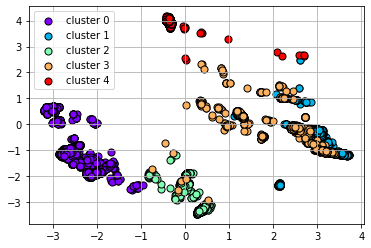

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

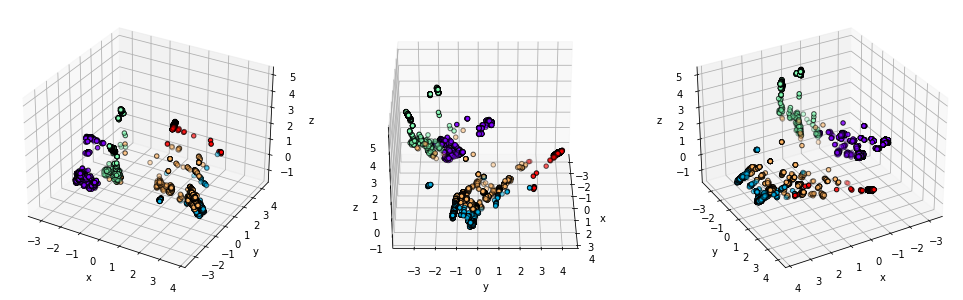

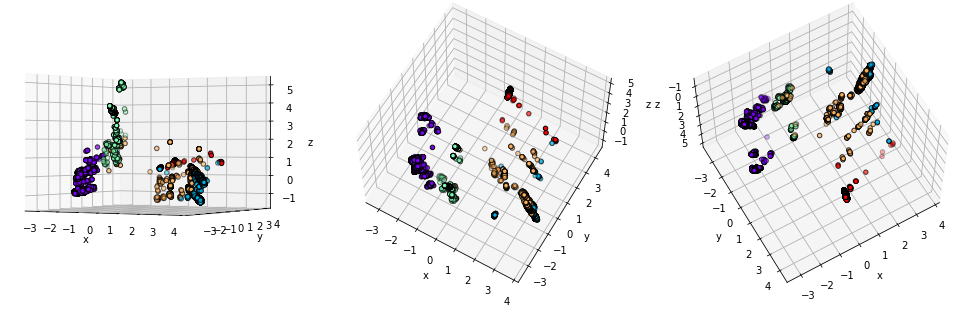

In [43]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [44]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [45]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -2.73601 -0.96871 -0.90466  0.06365  0.00142  0.06210 -0.42994 -0.51846   
1     -0.36128  3.95646  0.74233  0.36825  0.18259  0.59009 -0.66325  0.10637   
2     -0.36177  3.95394  0.74047  0.36649  0.18223  0.58837 -0.66020  0.10844   
3      3.55730 -1.17920 -0.15850  1.57287 -1.04156 -0.57422  0.60622 -0.14290   
4      3.55716 -1.14354 -0.18844  1.57003 -1.07949 -0.68654  0.67186 -0.24281   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -3.14777  0.66366  0.74312 -0.46753 -0.70465  0.72055  2.30396  0.32649   
18598  3.03839 -0.22550 -1.22287 -0.67421 -1.05250  0.50486 -0.36237 -0.26772   
18599  2.84754 -0.31898 -0.99144 -0.96470 -0.90998  0.23566 -0.10249  0.10016   
18600 -2.70513 -1.12888 -0.82653 -0.14968 -0.05461 -0.12061 -0.13384  0.15325   
18601 -2.75239 -1.23573 -0.93506  0.04560  0.23388  0.53674 -0.44275  0.20446   

             8        9       10       11       12       13       14       15  \
0      0.26872 -0.06324  0.80661 -0.50451  0.24735 -0.18178 -0.09641  0.11533   
1     -0.07619  0.28723 -0.29087  0.00312  0.06923  0.03369 -0.02276  0.04333   
2     -0.07796  0.28788 -0.28733 -0.00194  0.07323  0.03077 -0.01948  0.04311   
3     -0.37703 -0.19551 -0.33112 -0.18094 -0.13879 -0.26635 -0.03593 -0.34919   
4     -0.33558 -0.27787 -0.14405 -0.16074 -0.14790 -0.17380 -0.05061 -0.33783   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.38980  1.82597  0.22094 -0.27895  0.16847  0.36963 -0.14010 -0.42042   
18598  0.35876  0.01244  0.83367 -0.31533  0.46878 -0.17542  0.02932  0.07208   
18599 -0.34262  0.06591 -0.46294  0.11257 -0.08605 -0.13378  0.16362 -0.24628   
18600 -0.06866  0.09920 -0.18285 -0.37431  0.17230 -0.24644  0.04291 -0.02884   
18601 -0.08879  0.51976 -0.29478  0.27148 -0.17334 -0.24774  0.30157  0.14929   

            16       17       18       19       20       21       22       23  \
0      0.09919 -0.20668  0.05985  0.05284 -0.07547  0.06751 -0.03252  0.16391   
1      0.07015  0.00899  0.00432 -0.14275  0.13082  0.02014  0.00326 -0.02397   
2      0.06513  0.01720  0.00026 -0.14155  0.12912  0.02363  0.00896 -0.02688   
3      0.53337 -0.19799 -0.05404 -0.04114  0.14598 -0.06214 -0.09896  0.06174   
4      0.47062 -0.15802 -0.02179  0.02517  0.10235 -0.09842 -0.03301  0.08453   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.34227 -0.14667  0.10016 -0.00540 -0.33160  0.15003 -0.08469  0.33344   
18598  0.20339  0.13760  0.24937  0.22638 -0.04516 -0.18764 -0.21210  0.14652   
18599  0.16815  0.32720  0.08993 -0.12419  0.41596 -0.11434 -0.32653  0.00666   
18600  0.04955 -0.04383 -0.21480 -0.16853  0.25537  0.22043  0.12105 -0.04389   
18601  0.25821 -0.14961 -0.17249  0.49361 -0.12651 -0.02479  0.42570 -0.41849   

            24       25       26       27       28       29       30       31  \
0     -0.13381 -0.06261  0.08512 -0.13574 -0.02890  0.07121  0.04640 -0.08256   
1      0.01547 -0.08380  0.00245 -0.03505 -0.03623  0.03913 -0.03170 -0.03199   
2      0.02842 -0.08614  0.00339 -0.04362 -0.03263  0.04011 -0.02347 -0.03777   
3     -0.13192 -0.08785 -0.03197 -0.09804  0.12193  0.00755  0.01655  0.27393   
4     -0.13757 -0.11242 -0.08235 -0.11372  0.14090 -0.01122  0.00250  0.24149   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.13756  0.08970  0.00149 -0.34505 -0.18687 -0.00047 -0.03037 -0.16092   
18598  0.28481  0.15574 -0.05563  0.25069 -0.06010  0.12298 -0.24365 -0.28459   
18599  0.00531 -0.11203  0.32640 -0.05940  0.12713 -0.13904 -0.08344 -0.10919   
18600  0.39143 -0.01394  0.09003 -0.01180  0.09444  0.15210  0.21066  0.08857   
18601  0.39909  0.11396 -0.03046 -0.07632  0.16100 -0.02142  0.03408  0.22684   

            32       33       34       35       36       37       38       39  \
0      0.05500  0.12884 -0.06165 -0.0627

In [47]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [48]:
plt.rcParams["figure.figsize"] = (10,7)

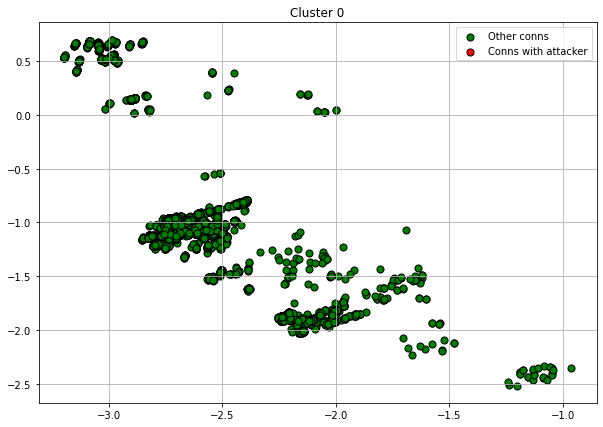

Total num of conns: 6887

Attacker conns ratio:
No    6887
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    1119
192.168.10.8      839
192.168.10.9      800
192.168.10.14     711
192.168.10.12     683
192.168.10.5      639
192.168.10.50     411
192.168.10.51     375
192.168.10.15     368
192.168.10.25     340
192.168.10.17     337
192.168.10.16     265
Name: originated_ip, dtype: int64

192.168.10.3    6887
Name: responded_ip, dtype: int64

Cluster 0 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num  responded_ip  \
12821            1.00000  192.168.10.14           0.85685  192.168.10.3   
3854             1.00000   192.168.10.9           0.85685  192.168.10.3   
10446            1.00000   192.168.10.8           0.85685  192.168.10.3   
10048            1.00000  192.168.10.50           0.85685  192.168.10.3   
16255            1.00000  192.168.10.19           0.85685  192.168.10.3   
1988             1.00000  192.168.10.50           0.85685  192.168.10.3   
234              1.00000   192.168.10.8           0.85685  192.168.10.3   
3991             1.00000  192.168.10.14           0.85685  192.168.10.3   
3099             1.00000   192.168.10.8           0.85685  192.168.10.3   
11344            1.00000  192.168.10.14           0.85685  192.168.10.3   
2014             1.00000  192.168.10.19           0.85685  192.168.10.3   
13775            1.00000  192.168.10.50           0.85685  192.168.10.3   
16917            1.00000  192.168.10.14           0.85685  192.168.10.3   
1559             1.00000  192.168.10.14           0.85685  192.168.10.3   
9395             1.00000  192.168.10.15           0.85685  192.168.10.3   

                         timestamp  connection.time  duration  \
12821  2017-07-04T18:08:39.050528Z          0.78849   0.04853   
3854    2017-07-04T18:10:18.75299Z          0.84389   0.02424   
10446  2017-07-04T17:45:43.243308Z          0.02401   0.00022   
10048  2017-07-04T18:02:16.849117Z          0.57612   0.00017   
16255  2017-07-04T17:58:53.082088Z          0.46289   0.00028   
1988   2017-07-04T18:02:16.851436Z          0.57612   0.00017   
234    2017-07-04T17:45:05.538929Z          0.00305   0.04154   
3991   2017-07-04T17:45:23.283126Z          0.01291   0.00016   
3099   2017-07-04T17:45:47.726194Z          0.02650   0.00021   
11344  2017-07-04T17:53:34.034659Z          0.28561   0.00016   
2014   2017-07-04T17:58:50.903829Z          0.46168   0.08972   
13775  2017-07-04T18:09:31.299192Z          0.81752   0.00025   
16917  2017-07-04T17:53:32.023856Z          0.28449   0.30907   
1559   2017-07-04T17:45:16.279351Z          0.00902   0.00019   
9395   2017-07-04T17:59:07.079798Z          0.47067   0.04993   

       connection.duration protocol service conn_state  connection.orig_p  \
12821              0.00003      udp     dns         SF            0.90633   
3854               0.00001      udp     dns         SF            0.88006   
10446              0.00000      udp     dns         SF            0.81142   
10048              0.00000      udp     dns         SF            0.68564   
16255              0.00000      udp     dns         SF            0.59141   
1988               0.00000      udp     dns         SF            0.25940   
234                0.00002      udp     dns         SF            0.96092   
3991               0.00000      udp     dns         SF            0.75789   
3099               0.00000      udp     dns         SF            0.87967   
11344              0.00000      udp     dns         SF            0.93781   
2014               0.00005      udp     dns         SF            0.95898   
13775              0.00000      udp     dns         SF            0.18115   
16917              0.00018      udp     dns         SF            0.95248   
1559               0.00000      udp     dns         SF            0.95593   
9395               0.00003      udp     dns         SF            0.85966   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
12821   59392  orig_reg_or_dyn                0.00088       88   
3854    57671  orig_reg_or_dyn                0.00072       72   
10446   53173  orig_reg_or_dyn                0.00082       82   
10048   44931  orig_reg_or_dyn                0.00046       46   
16255   38756  orig_reg_or_dyn                0.00064       64   
1988    17001  orig_reg_or_dyn                0.00046       46   
234     62969  orig_reg_or_dyn                0.00072       72   
3991

Protocol:
udp    6791
tcp      96
Name: protocol, dtype: int64

Service:
dns                6715
none                 79
krb                  32
ntp                  30
krb_tcp              11
dce_rpc               9
smb,krb,gssapi        8
smb,ntlm,gssapi       2
smb                   1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    6845
orig_well_known      42
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            6703
resp_well_known     124
resp_123             30
resp_reg             25
resp_dyn              5
Name: resp_p_cat, dtype: int64




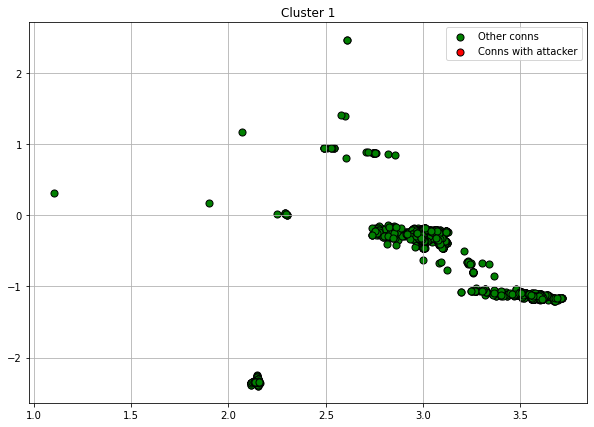

Total num of conns: 3814

Attacker conns ratio:
No     3700
Yes     114
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    997
192.168.10.19    638
192.168.10.51    528
192.168.10.12    364
192.168.10.5     278
192.168.10.9     266
192.168.10.14    199
192.168.10.8     193
192.168.10.15    185
192.168.10.16    106
192.168.10.17     56
192.168.10.3       2
192.168.10.50      2
Name: originated_ip, dtype: int64

172.16.0.1       114
52.84.145.136     93
52.84.145.207     66
162.213.33.50     60
52.84.145.252     54
                ... 
176.32.96.208      1
54.71.1.254        1
172.217.9.227      1
74.217.63.38       1
52.84.145.123      1
Name: responded_ip, Length: 994, dtype: int64

Cluster 1 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num     responded_ip  \
5925             1.00000  192.168.10.51           0.76639    172.217.6.193   
4201             1.00000  192.168.10.12           0.76639      172.217.7.1   
336              1.00000  192.168.10.51           0.76639     172.217.10.2   
14163            1.00000  192.168.10.15           0.27191   64.147.131.160   
13149            1.00000  192.168.10.19           0.13580    34.197.164.44   
8685             1.00000  192.168.10.19           0.22655   54.164.105.151   
13224            1.00000  192.168.10.25           0.76639    172.217.10.46   
4524             1.00000  192.168.10.25           0.76639    172.217.10.46   
13838            1.00000   192.168.10.8           0.88754      199.96.57.6   
8170             1.00000  192.168.10.19           0.45354    104.88.65.156   
10401            1.00000  192.168.10.19           0.76639   172.217.10.102   
16943            1.00000  192.168.10.19           0.28876    68.67.178.176   
4816             1.00000  192.168.10.14           0.15170       38.65.9.50   
5737             1.00000  192.168.10.19           0.77140  173.241.254.199   
8382             1.00000  192.168.10.15           0.15266    38.118.195.49   

                         timestamp  connection.time  duration  \
5925   2017-07-04T17:46:48.191205Z          0.06009 120.49541   
4201   2017-07-04T18:01:25.385781Z          0.54752   0.73172   
336    2017-07-04T17:53:34.840902Z          0.28606 119.19291   
14163  2017-07-04T18:05:49.852322Z          0.69447   5.71599   
13149  2017-07-04T17:57:16.962258Z          0.40948 242.27317   
8685   2017-07-04T17:57:20.968711Z          0.41171  65.49272   
13224  2017-07-04T17:46:52.043812Z          0.06224   0.18083   
4524   2017-07-04T17:46:51.337933Z          0.06184   0.33757   
13838  2017-07-04T18:03:11.749162Z          0.60662   0.13752   
8170   2017-07-04T17:47:14.466028Z          0.07469 115.55451   
10401  2017-07-04T17:47:15.049585Z          0.07502   5.94699   
16943  2017-07-04T17:58:51.388491Z          0.46195  10.62339   
4816   2017-07-04T17:45:19.962268Z          0.01107   5.57036   
5737   2017-07-04T17:59:23.386528Z          0.47973   0.82693   
8382   2017-07-04T17:59:06.236422Z          0.47020  15.61472   

       connection.duration protocol service conn_state  connection.orig_p  \
5925               0.07168      tcp     ssl         SF            0.57636   
4201               0.00044      tcp     ssl       RSTO            0.56079   
336                0.07090      tcp     ssl         SF            0.89224   
14163              0.00340      tcp     ssl         SF            0.86731   
13149              0.14412      tcp     ssl         SF            0.54771   
8685               0.03896      tcp     ssl         SF            0.88049   
13224              0.00011      tcp     ssl         SF            0.92421   
4524               0.00020      tcp     ssl         SF            0.92411   
13838              0.00008      tcp     ssl         SF            0.85015   
8170               0.06874      tcp     ssl       RSTR            0.88498   
10401              0.00354      tcp     ssl         SF            0.68415   
16943              0.00632      tcp     ssl         SF            0.61678   
4816               0.00331      tcp     ssl         SF            0.85693   
5737               0.00049      tcp     ssl         SF            0.65684   
8382               0.00929      tcp     ssl         SF            0.86668   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
5925    37770  orig_reg_or_dyn                0.01841     1839   
4201    36750  orig_reg_or_dyn                0.00536      535   
336     58469  orig_reg_or_dyn                0.02470     2467   
14163   56835  orig_reg_or_dyn                0.01595     1593   
13149   35893  orig_reg_or_dyn                0.41721    41678   
8685    57699  orig_reg_or_dyn                0.00817      816   
13224   60564  orig_re

Protocol:
tcp    3813
udp       1
Name: protocol, dtype: int64

Service:
ssl     3790
none      23
dns        1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3813
orig_well_known       1
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3781
resp_well_known      33
Name: resp_p_cat, dtype: int64




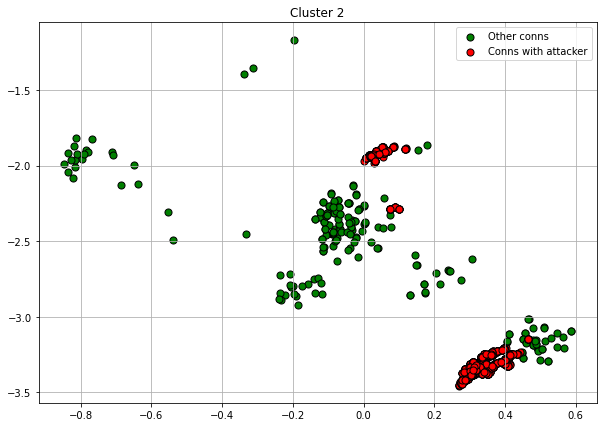

Total num of conns: 1479

Attacker conns ratio:
Yes    1260
No      219
Name: attacker_label, dtype: int64

IPs:
172.16.0.1       1260
192.168.10.25      42
192.168.10.16      25
192.168.10.12      24
192.168.10.19      23
192.168.10.51      21
192.168.10.5       19
192.168.10.14      16
192.168.10.9       16
192.168.10.8       15
192.168.10.15      10
192.168.10.17       8
Name: originated_ip, dtype: int64

192.168.10.50    1479
Name: responded_ip, dtype: int64

Cluster 2 NOK sample connections:


originated_ip_num originated_ip  responded_ip_num   responded_ip  \
2102             0.84000    172.16.0.1           0.85685  192.168.10.50   
1655             0.84000    172.16.0.1           0.85685  192.168.10.50   
4020             0.84000    172.16.0.1           0.85685  192.168.10.50   
15258            0.84000    172.16.0.1           0.85685  192.168.10.50   
18523            0.84000    172.16.0.1           0.85685  192.168.10.50   
10330            0.84000    172.16.0.1           0.85685  192.168.10.50   
18204            0.84000    172.16.0.1           0.85685  192.168.10.50   
9248             0.84000    172.16.0.1           0.85685  192.168.10.50   
16189            0.84000    172.16.0.1           0.85685  192.168.10.50   
2225             0.84000    172.16.0.1           0.85685  192.168.10.50   
1333             0.84000    172.16.0.1           0.85685  192.168.10.50   
10762            0.84000    172.16.0.1           0.85685  192.168.10.50   
4083             0.84000    172.16.0.1           0.85685  192.168.10.50   
16063            0.84000    172.16.0.1           0.85685  192.168.10.50   
12279            0.84000    172.16.0.1           0.85685  192.168.10.50   

                         timestamp  connection.time  duration  \
2102   2017-07-04T18:02:52.975805Z          0.59619  11.87701   
1655   2017-07-04T17:49:24.737812Z          0.14708  11.90700   
4020   2017-07-04T18:04:50.459357Z          0.66147  12.17140   
15258  2017-07-04T18:01:08.281176Z          0.53802  12.94687   
18523  2017-07-04T17:58:03.429814Z          0.43530  11.58705   
10330  2017-07-04T17:51:57.990376Z          0.23224  10.52073   
18204  2017-07-04T17:53:15.944625Z          0.27556  12.14432   
9248    2017-07-04T17:56:27.91604Z          0.38223  11.87585   
16189  2017-07-04T18:03:05.025113Z          0.60289  12.61029   
2225   2017-07-04T17:57:42.778823Z          0.42383  12.87374   
1333   2017-07-04T17:49:26.629385Z          0.14813  13.24859   
10762  2017-07-04T17:58:24.924523Z          0.44724  12.14446   
4083   2017-07-04T18:05:26.778377Z          0.68165  11.14936   
16063   2017-07-04T17:55:40.78388Z          0.35604  13.07211   
12279  2017-07-04T18:06:15.481574Z          0.70872  12.70255   

       connection.duration protocol service conn_state  connection.orig_p  \
2102               0.00707      tcp     ssh         SF            0.78711   
1655               0.00708      tcp     ssh         SF            0.76629   
4020               0.00724      tcp     ssh         SF            0.79013   
15258              0.00770      tcp     ssh         SF            0.78397   
18523              0.00689      tcp     ssh         SF            0.77945   
10330              0.00626      tcp     ssh         SF            0.77038   
18204              0.00722      tcp     ssh         SF            0.77249   
9248               0.00706      tcp     ssh         SF            0.77704   
16189              0.00750      tcp     ssh         SF            0.78742   
2225               0.00766      tcp     ssh         SF            0.77893   
1333               0.00788      tcp     ssh         SF            0.76639   
10762              0.00722      tcp     ssh         SF            0.77994   
4083               0.00663      tcp     ssh         SF            0.79117   
16063              0.00778      tcp     ssh         SF            0.77594   
12279              0.00756      tcp     ssh         SF            0.79236   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
2102    51580  orig_reg_or_dyn                0.02010     2008   
1655    50216  orig_reg_or_dyn                0.02010     2008   
4020    51778  orig_reg_or_dyn                0.02010     2008   
15258   51374  orig_reg_or_dyn                0.02010     2008   
18523   51078  orig_reg_or_dyn                0.02010     2008   
10330   50484  orig_reg_or_dyn                0.02010     2008   
18204   50622  orig_reg_or_dyn                0.02010     2008   
9248

Cluster 2 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num   responded_ip  \
6407             1.00000  192.168.10.19           0.85685  192.168.10.50   
14936            1.00000   192.168.10.8           0.85685  192.168.10.50   
15842            1.00000  192.168.10.15           0.85685  192.168.10.50   
3142             1.00000  192.168.10.25           0.85685  192.168.10.50   
17648            1.00000  192.168.10.16           0.85685  192.168.10.50   
8383             1.00000   192.168.10.9           0.85685  192.168.10.50   
2133             1.00000  192.168.10.25           0.85685  192.168.10.50   
12898            1.00000   192.168.10.5           0.85685  192.168.10.50   
3370             1.00000  192.168.10.16           0.85685  192.168.10.50   
3804             1.00000  192.168.10.16           0.85685  192.168.10.50   
12382            1.00000  192.168.10.12           0.85685  192.168.10.50   
13045            1.00000  192.168.10.51           0.85685  192.168.10.50   
14853            1.00000  192.168.10.12           0.85685  192.168.10.50   
7205             1.00000  192.168.10.25           0.85685  192.168.10.50   
14363            1.00000  192.168.10.51           0.85685  192.168.10.50   

                         timestamp  connection.time  duration  \
6407   2017-07-04T17:51:05.357871Z          0.20299   1.32761   
14936  2017-07-04T17:49:32.940895Z          0.15164   1.59124   
15842  2017-07-04T17:57:10.734917Z          0.40602   0.25574   
3142   2017-07-04T18:08:16.759946Z          0.77611   0.07631   
17648  2017-07-04T18:05:58.198451Z          0.69911   0.00007   
8383   2017-07-04T18:01:04.600456Z          0.53597   0.26477   
2133   2017-07-04T17:49:21.612867Z          0.14535   0.07542   
12898  2017-07-04T17:55:02.216642Z          0.33461   0.10311   
3370   2017-07-04T17:51:15.382801Z          0.20856   0.14237   
3804    2017-07-04T18:00:15.52558Z          0.50870   0.14054   
12382  2017-07-04T17:51:32.542174Z          0.21810   0.00882   
13045  2017-07-04T18:13:14.476239Z          0.94154   1.32852   
14853  2017-07-04T17:56:02.552107Z          0.36813   0.12891   
7205   2017-07-04T18:05:19.109416Z          0.67739   0.00000   
14363  2017-07-04T17:57:00.891637Z          0.40055   0.00907   

       connection.duration protocol             service conn_state  \
6407               0.00079      tcp                 ssh         SF   
14936              0.00095      tcp                 ssh         SF   
15842              0.00015      tcp                 ftp         SF   
3142               0.00005      tcp  smb,gssapi,dce_rpc         SF   
17648              0.00000      tcp                none        OTH   
8383               0.00016      tcp                 ftp         SF   
2133               0.00004      tcp  smb,gssapi,dce_rpc         SF   
12898              0.00006      tcp            ftp-data         SF   
3370               0.00008      tcp                 ftp         SF   
3804               0.00008      tcp                 ftp         SF   
12382              0.00001      tcp            ftp-data         SF   
13045              0.00079      tcp                 ssh         SF   
14853              0.00008      tcp                 ftp         SF   
7205               0.00000      udp                 dns        SHR   
14363              0.00001      tcp            ftp-data         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
6407             0.78841   51665  orig_reg_or_dyn                0.01365   
14936            0.84878   55621  orig_reg_or_dyn                0.01285   
15842            0.86654   56785  orig_reg_or_dyn                0.00088   
3142             0.94024   61614  orig_reg_or_dyn                0.01245   
17648            0.88676   58110  orig_reg_or_dyn                0.00000   
8383             0.11646    7634  orig_reg_or_dyn                0.00088   
2133             0.92498   60614  orig_reg_or_dyn                0.01245   
12898            0.8

Protocol:
tcp    1437
udp      42
Name: protocol, dtype: int64

Service:
ssh                   1280
none                    64
dns                     42
ftp                     40
ftp-data                40
smb,gssapi,dce_rpc      13
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1450
orig_well_known      29
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_22            1333
resp_well_known      66
resp_21              40
resp_reg             28
resp_dyn             12
Name: resp_p_cat, dtype: int64




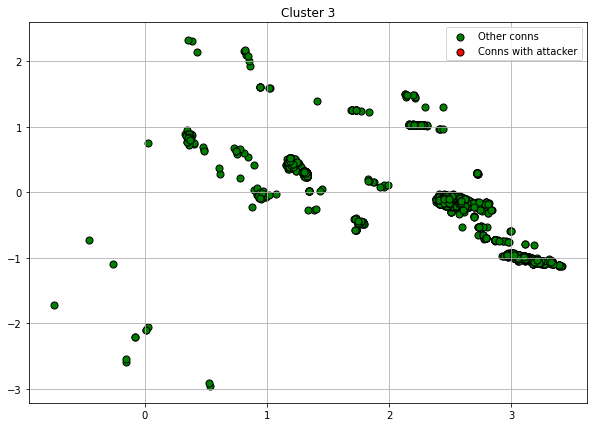

Total num of conns: 2807

Attacker conns ratio:
No    2807
Name: attacker_label, dtype: int64

IPs:
192.168.10.25     711
192.168.10.17     362
192.168.10.9      292
192.168.10.14     275
192.168.10.8      240
192.168.10.12     215
192.168.10.19     169
192.168.10.5      155
192.168.10.16     150
192.168.10.15     116
192.168.10.51      98
192.168.10.50      21
63.241.108.104      1
185.49.84.72        1
123.130.127.12      1
Name: originated_ip, dtype: int64

178.255.83.1      112
23.60.139.27       98
23.50.75.27        94
72.21.91.29        94
50.63.243.230      91
                 ... 
5.39.44.193         1
104.73.246.168      1
151.101.46.109      1
63.251.210.243      1
172.217.10.78       1
Name: responded_ip, Length: 538, dtype: int64

Cluster 3 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num     responded_ip  \
10346            1.00000  192.168.10.51           0.79447     178.255.83.1   
8010             1.00000  192.168.10.12           0.88909  199.182.221.110   
15136            1.00000   192.168.10.5           0.76639    172.217.6.202   
1440             1.00000  192.168.10.51           0.76280      172.16.10.1   
14273            1.00000  192.168.10.12           0.28039     66.110.99.19   
2957             1.00000  192.168.10.19           0.08293      23.50.75.27   
12804            1.00000  192.168.10.51           0.79447     178.255.83.1   
7368             1.00000  192.168.10.25           0.22783   54.236.115.212   
5668             1.00000  192.168.10.19           0.85685   192.168.10.255   
1341             1.00000  192.168.10.15           0.76639   172.217.12.142   
11478            1.00000  192.168.10.15           0.30620      72.21.91.29   
1093             1.00000  192.168.10.14           0.08312     23.60.139.27   
4483             1.00000  192.168.10.25           0.76639    172.217.6.196   
6852             1.00000  192.168.10.25           0.05915    17.253.20.125   
11857            1.00000  192.168.10.25           0.76639     172.217.10.3   

                         timestamp  connection.time  duration  \
10346  2017-07-04T17:53:28.002878Z          0.28226   0.05289   
8010   2017-07-04T17:47:31.088993Z          0.08393   0.07187   
15136  2017-07-04T18:14:40.046793Z          0.98908   5.44909   
1440   2017-07-04T18:06:39.203478Z          0.72190   0.00000   
14273  2017-07-04T17:45:09.764187Z          0.00540  74.25967   
2957   2017-07-04T17:57:15.396667Z          0.40861  92.76849   
12804  2017-07-04T17:53:28.005959Z          0.28226   3.36219   
7368   2017-07-04T18:06:23.371703Z          0.71310   0.00000   
5668   2017-07-04T17:45:58.341033Z          0.03239   0.00002   
1341   2017-07-04T18:11:14.133225Z          0.87467   5.85002   
11478  2017-07-04T17:52:19.398726Z          0.24413 115.30007   
1093   2017-07-04T17:58:48.601044Z          0.46040   5.29986   
4483   2017-07-04T18:09:10.017096Z          0.80570   0.00000   
6852   2017-07-04T17:53:08.598806Z          0.27147   0.02822   
11857  2017-07-04T17:49:29.691643Z          0.14983   0.16427   

       connection.duration protocol service conn_state  connection.orig_p  \
10346              0.00003      tcp    http         SF            0.90221   
8010               0.00004      udp     ntp         SF            0.00183   
15136              0.00324      tcp    none         SF            0.89797   
1440               0.00000      tcp    none         S0            0.79450   
14273              0.04417      tcp    none       RSTR            0.77136   
2957               0.05518      tcp    http         SF            0.53781   
12804              0.00200      tcp    none         SF            0.90222   
7368               0.00000      tcp    none         SH            0.93798   
5668               0.00000      udp     dns         S0            0.00204   
1341               0.00348      tcp    none         SF            0.86941   
11478              0.06859      tcp    http         SF            0.86563   
1093               0.00315      tcp    none         SF            0.86039   
4483               0.00000      tcp    none         SH            0.93774   
6852               0.00002      udp     ntp         SF            0.00183   
11857              0.00010      tcp    http         SF            0.92504   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
10346   59122  orig_reg_or_dyn                0.00438      438   
8010      123  orig_well_known                0.00048       48   
15136   58844  orig_reg_or_dyn                0.00000        0   
1440    52064  orig_reg_or_dyn                0.00000        0   
14273   50548  orig_reg_or_dyn                0.00032       32   
2957    35244  orig_reg_or_dyn                0.06054     6048   
12804   59123  orig_re

Protocol:
tcp     2361
udp      443
icmp       3
Name: protocol, dtype: int64

Service:
http                  1239
none                  1129
ntp                    342
dns                     84
ssl                      7
smb,gssapi,dce_rpc       2
ssh                      2
ftp-data                 1
ftp                      1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2388
orig_well_known     419
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            1721
resp_443            632
resp_123            342
resp_well_known      97
resp_reg             12
resp_22               2
resp_21               1
Name: resp_p_cat, dtype: int64




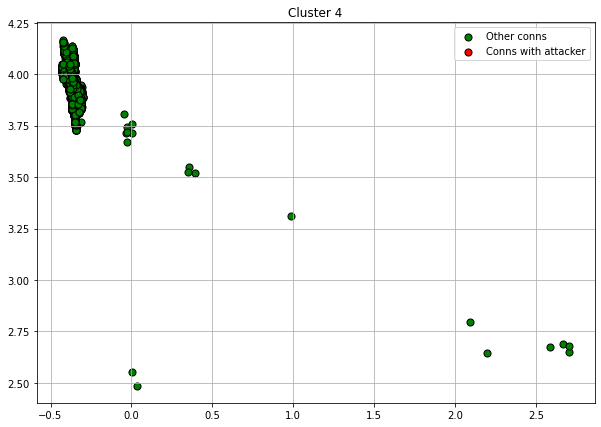

Total num of conns: 3615

Attacker conns ratio:
No    3615
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     3613
192.168.10.50       2
Name: originated_ip, dtype: int64

192.168.10.1      3596
192.168.10.255       9
13.84.218.189        2
224.0.0.251          2
65.52.108.233        1
224.0.0.252          1
65.52.108.254        1
65.52.108.186        1
131.253.34.234       1
224.0.1.24           1
Name: responded_ip, dtype: int64

Cluster 4 OK sample connections:


originated_ip_num originated_ip  responded_ip_num  responded_ip  \
9409             1.00000  192.168.10.3           0.85685  192.168.10.1   
14572            1.00000  192.168.10.3           0.85685  192.168.10.1   
3220             1.00000  192.168.10.3           0.85685  192.168.10.1   
6484             1.00000  192.168.10.3           0.85685  192.168.10.1   
11595            1.00000  192.168.10.3           0.85685  192.168.10.1   
9131             1.00000  192.168.10.3           0.85685  192.168.10.1   
13809            1.00000  192.168.10.3           0.85685  192.168.10.1   
9687             1.00000  192.168.10.3           0.85685  192.168.10.1   
7863             1.00000  192.168.10.3           0.85685  192.168.10.1   
13009            1.00000  192.168.10.3           0.85685  192.168.10.1   
1482             1.00000  192.168.10.3           0.85685  192.168.10.1   
2765             1.00000  192.168.10.3           0.85685  192.168.10.1   
12088            1.00000  192.168.10.3           0.85685  192.168.10.1   
18056            1.00000  192.168.10.3           0.85685  192.168.10.1   
8004             1.00000  192.168.10.3           0.85685  192.168.10.1   

                         timestamp  connection.time  duration  \
9409   2017-07-04T17:45:20.832235Z          0.01155   3.31234   
14572  2017-07-04T17:57:16.449967Z          0.40920   0.06048   
3220   2017-07-04T18:03:05.195129Z          0.60298   0.06026   
6484    2017-07-04T17:45:43.73339Z          0.02428   0.09911   
11595  2017-07-04T17:45:42.970922Z          0.02385   0.06095   
9131    2017-07-04T18:09:49.25767Z          0.82750   2.59817   
13809  2017-07-04T17:45:43.257648Z          0.02401   0.03069   
9687   2017-07-04T18:00:29.023087Z          0.51620   0.05961   
7863   2017-07-04T17:57:13.358027Z          0.40748   0.02416   
13009  2017-07-04T17:49:02.742576Z          0.13486   0.02345   
1482   2017-07-04T18:09:48.950311Z          0.82733   0.06080   
2765    2017-07-04T18:06:16.34561Z          0.70920   0.02371   
12088  2017-07-04T18:14:03.060209Z          0.96853   0.91347   
18056  2017-07-04T17:45:44.027877Z          0.02444   0.14277   
8004   2017-07-04T17:54:37.444043Z          0.32084   0.24954   

       connection.duration protocol service conn_state  connection.orig_p  \
9409               0.00197      udp     dns         SF            0.94102   
14572              0.00004      udp     dns         SF            0.94314   
3220               0.00004      udp     dns         SF            0.93958   
6484               0.00006      udp     dns         SF            0.94630   
11595              0.00004      udp     dns         SF            0.92078   
9131               0.00155      udp     dns         SF            0.95384   
13809              0.00002      udp     dns         SF            0.94312   
9687               0.00004      udp     dns         SF            0.92373   
7863               0.00001      udp     dns         SF            0.93481   
13009              0.00001      udp     dns         SF            0.91787   
1482               0.00004      udp     dns         SF            0.92290   
2765               0.00001      udp     dns         SF            0.94265   
12088              0.00054      udp     dns         SF            0.92631   
18056              0.00008      udp     dns         SF            0.93201   
8004               0.00015      udp     dns         SF            0.93079   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
9409    61665  orig_reg_or_dyn                0.00175      175   
14572   61804  orig_reg_or_dyn                0.00064       64   
3220    61571  orig_reg_or_dyn                0.00055       55   
6484    62011  orig_reg_or_dyn                0.00061       61   
11595   60339  orig_reg_or_dyn                0.00046       46   
9131    62505  orig_reg_or_dyn                0.00110      110   
13809   61803  orig_reg_or_dyn                0.00060       60   
9687    60532  orig_

Protocol:
udp    3609
tcp       6
Name: protocol, dtype: int64

Service:
dns     3605
none       6
ssl        4
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3605
orig_well_known      10
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            3596
resp_well_known      10
resp_443              6
resp_reg              3
Name: resp_p_cat, dtype: int64




In [49]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [50]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

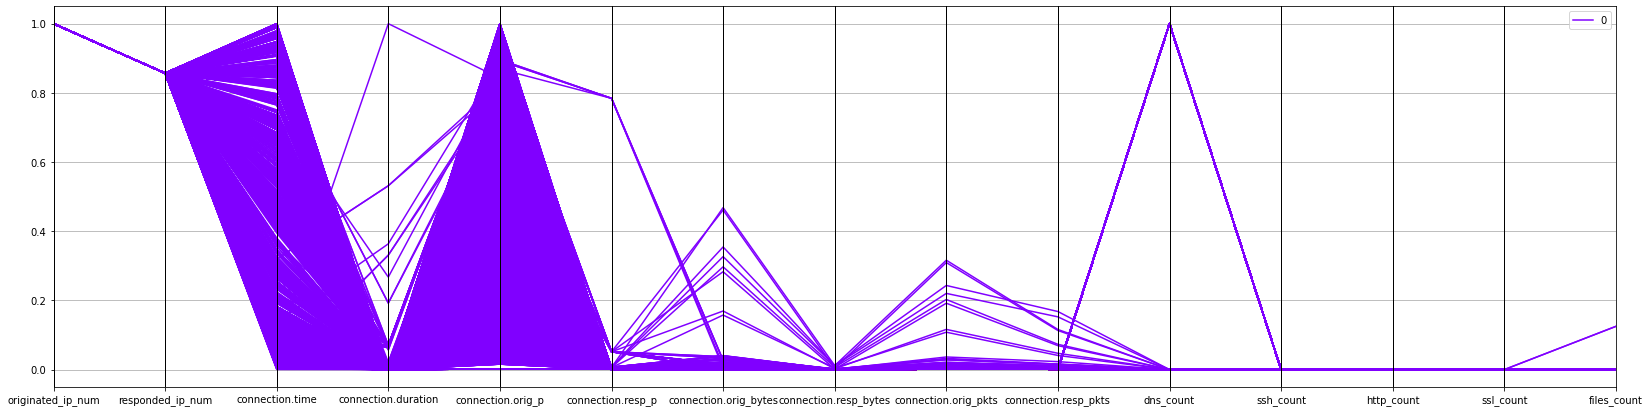

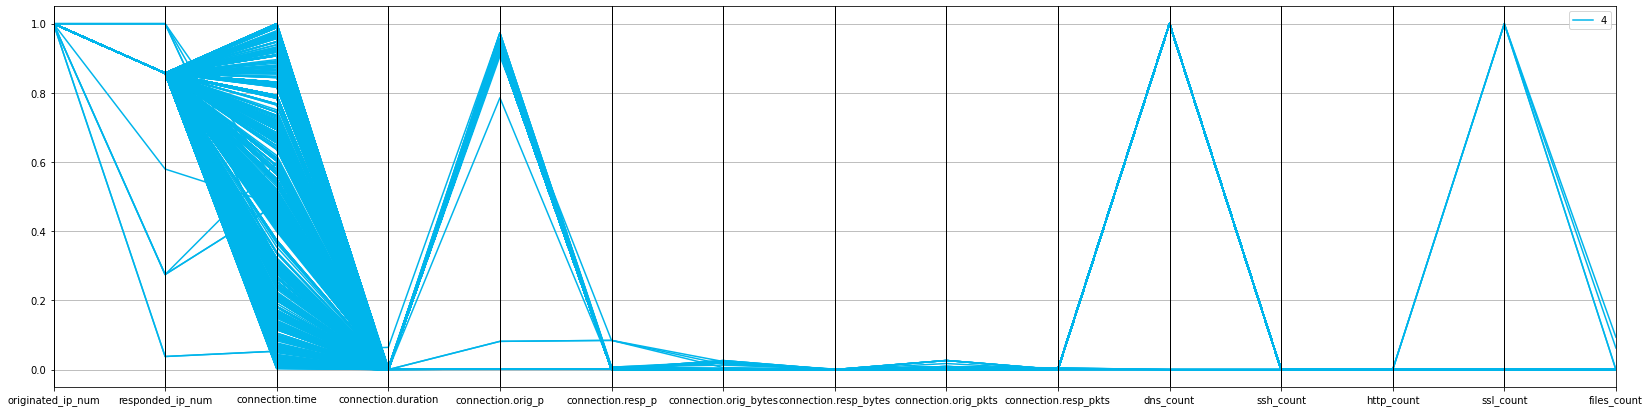

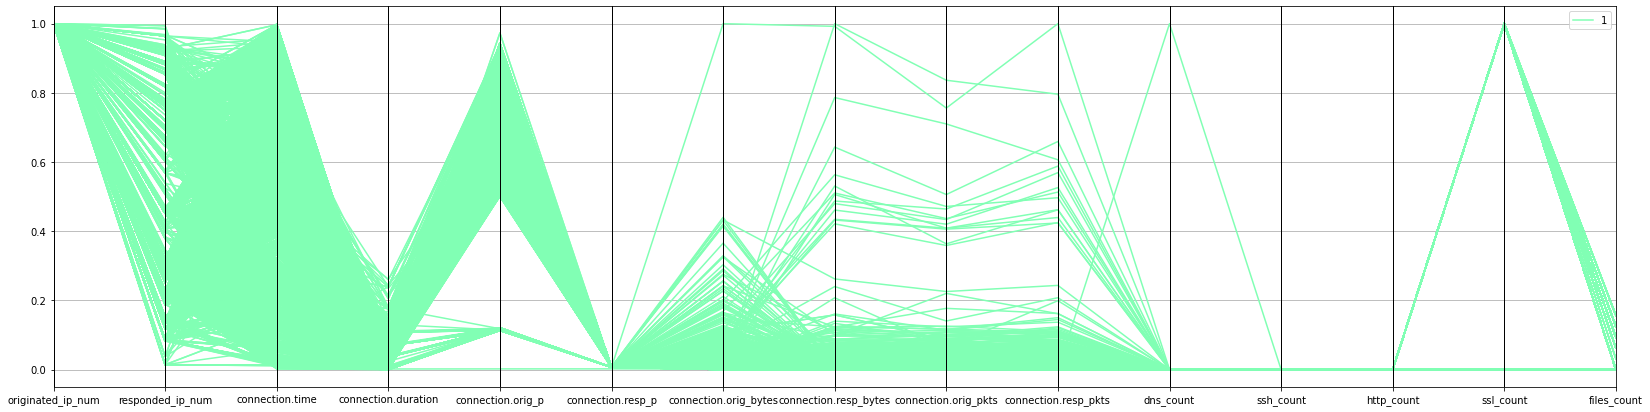

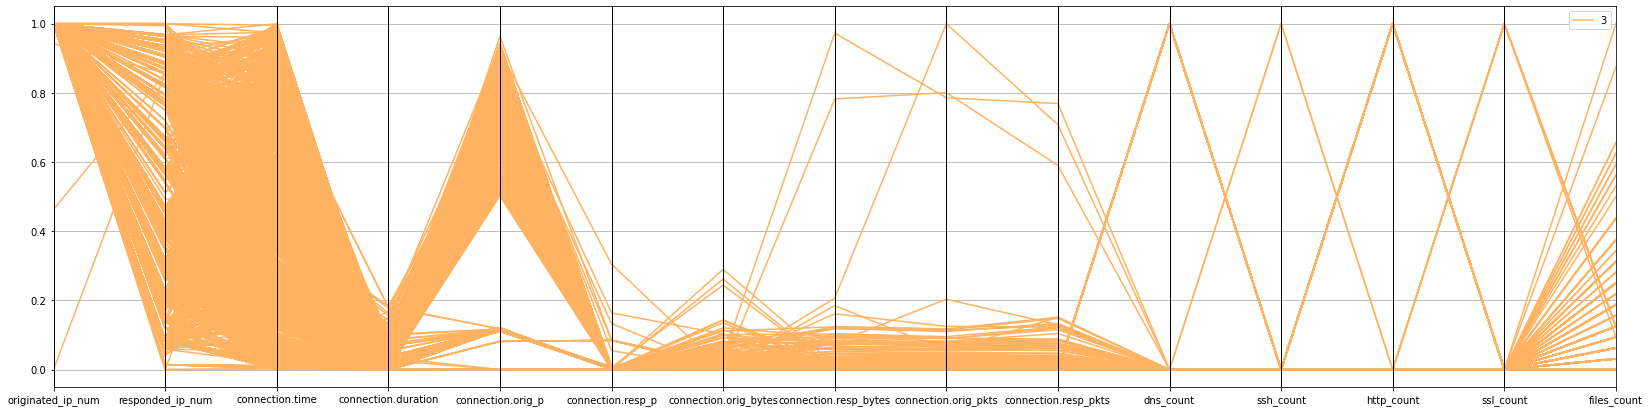

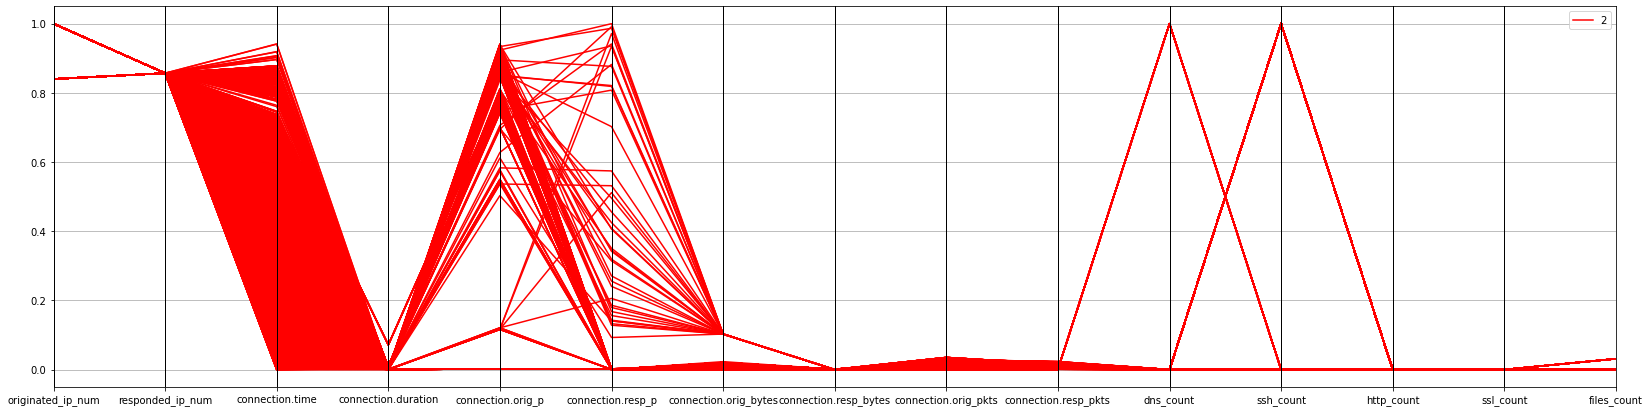

In [51]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

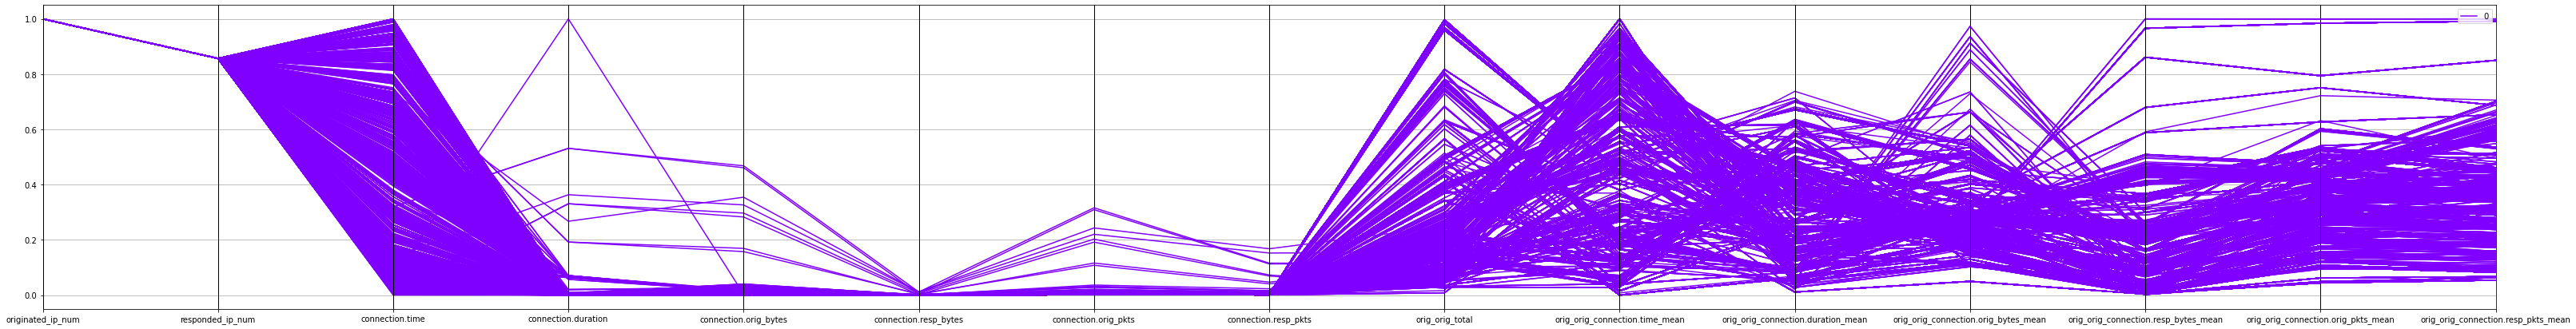

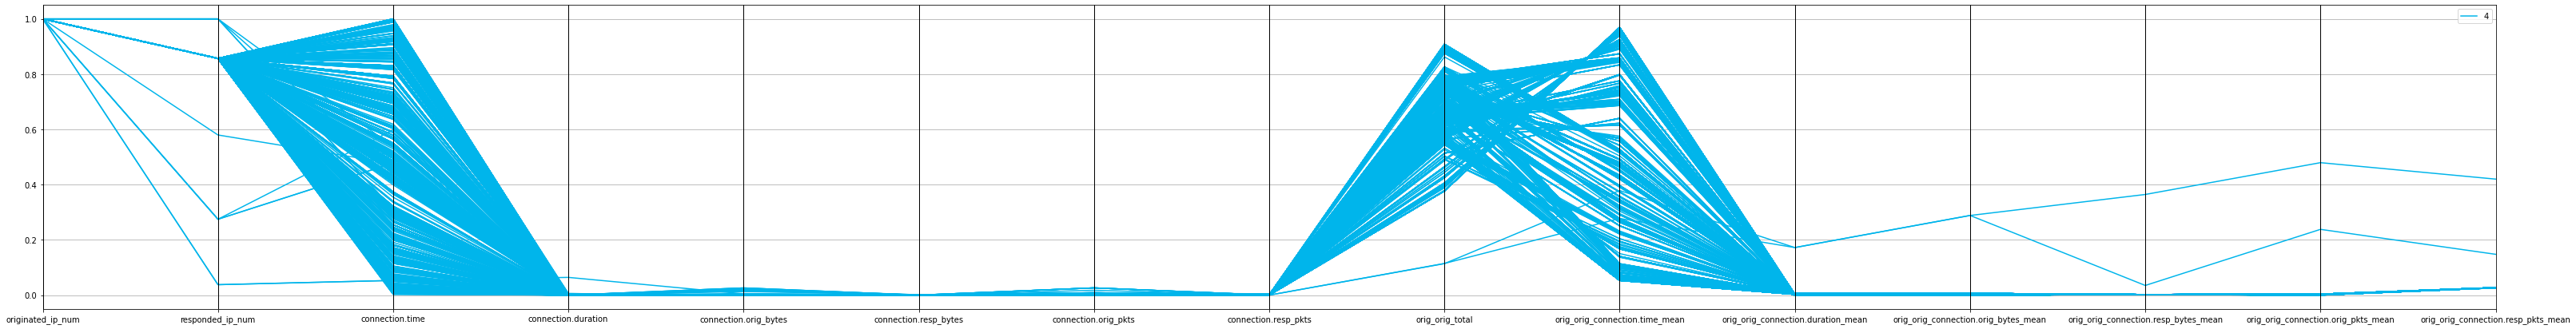

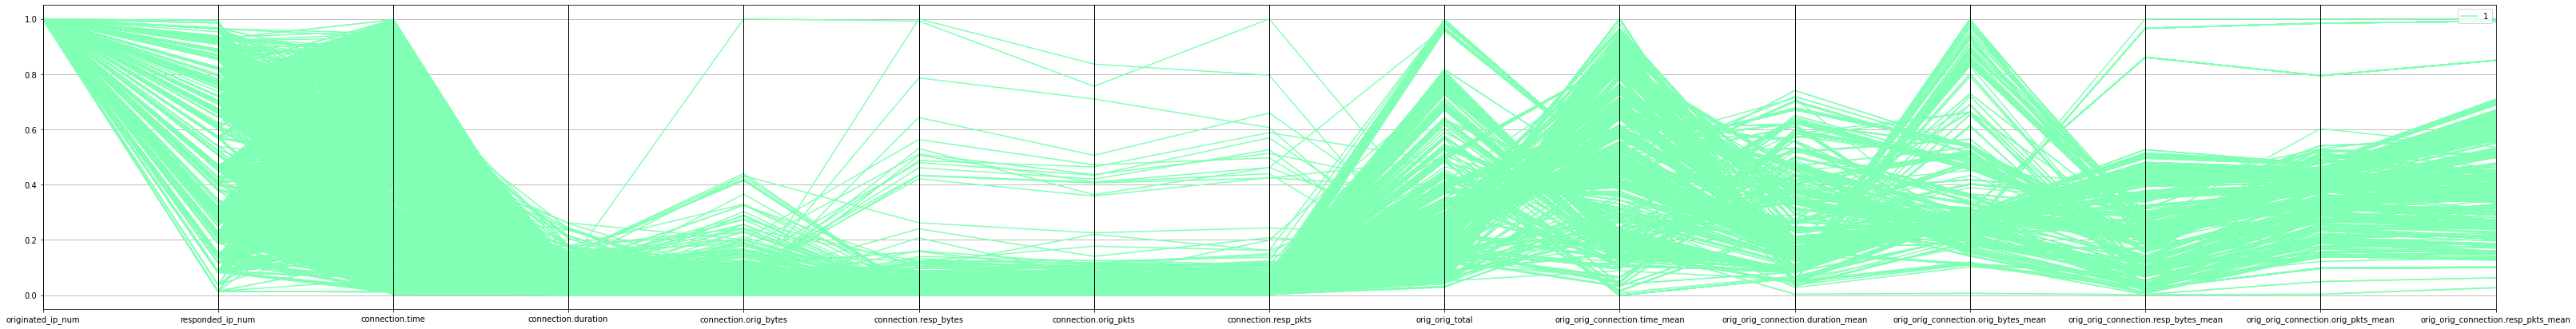

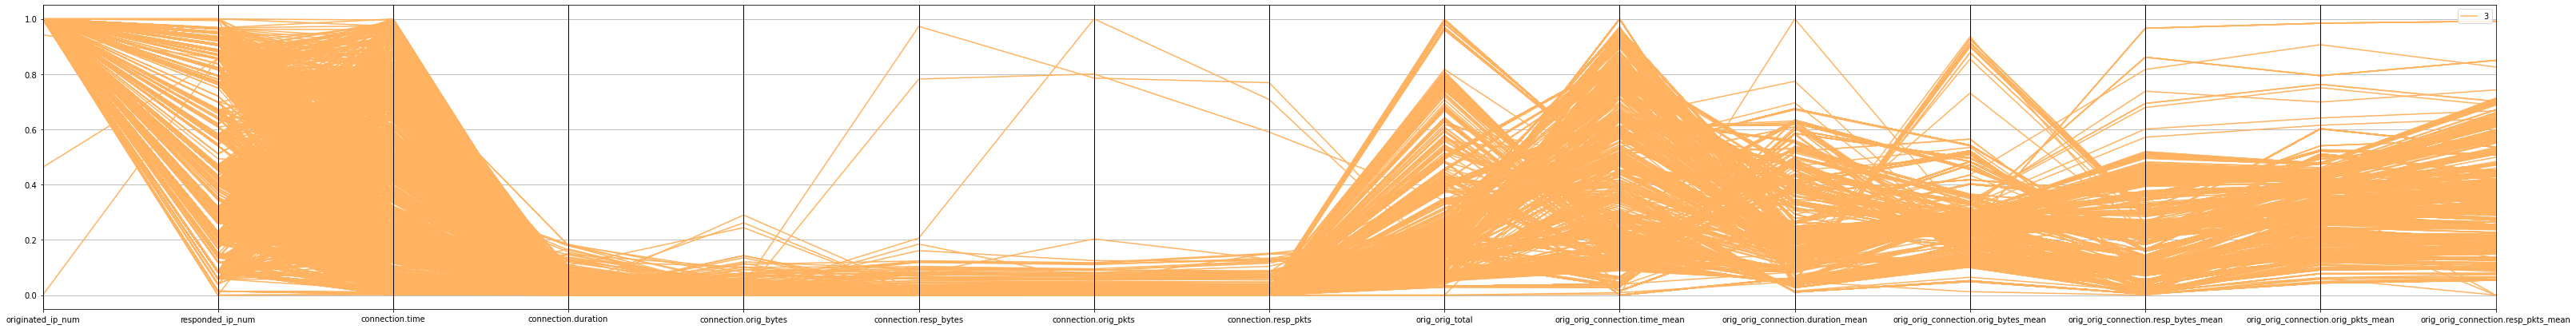

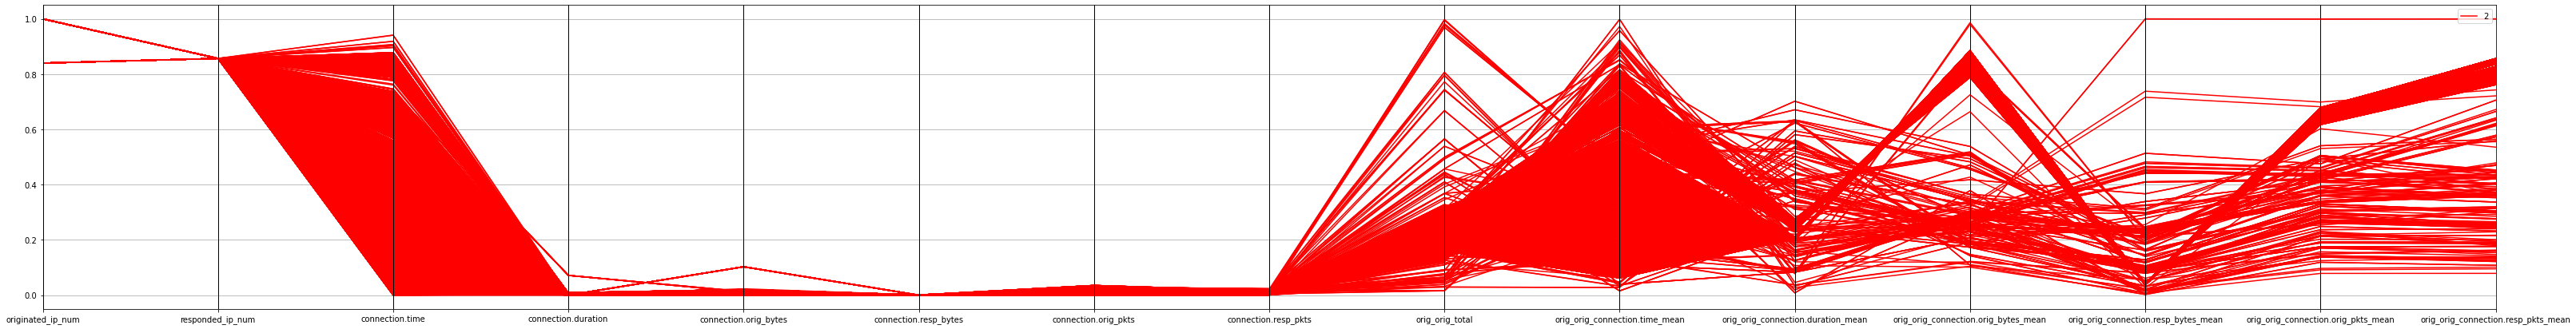

In [52]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()